In [127]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
start_date = "2022-01-01"
end_date = "2023-01-01"
tickers = ["EXAE.AT", "WSX.BE", "^IBEX", "KRW=X", "^ATX", "FTSEMIB.MI", "^GDAXI",
           "^OSEAX", "JSE.JO", "^MXX", "^OMXH25", "^BVSP", "CHILE.SN", "^AEX", "^BFX", "^SPX",
           "^OMX", "VNM", "^SSMI", "^HSI", "TASE.TA", "^FCHI", "LSEG.L", "S68.SI", "000001.SS", "^GSPTSE",
            "BOURSA.KW", "^ISEQ", "ASX.AX", "^N225", "DFM.AE", "^TWII", "^OMXC25", "^NSEI", "^MERV", "XU100.IS"]

In [128]:
data = pd.read_csv('all.csv', index_col='Date')
df = data.loc[start_date:end_date].copy()

In [ ]:
# getting data...
# data = yf.Tickers(tickers).history(start=start_date, end=end_date)["Close"]
# data.columns = data.columns.get_level_values(0)
# data.columns.name = None
# df = data.copy()
# df = df.ffill()
# df.loc['2020-02-02 00:00:00', 'DFM.AE'] = df.loc['2020-01-31 00:00:00', 'DFM.AE']

### long

In [117]:
lookback = 12
trade_period = 9
compo = 1
portfolio, dates, annotations = [], [], []

for i in range(0, len(df) - lookback - trade_period, trade_period):
    window = df.iloc[i:i+lookback]
    returns = (window.iloc[-1] - window.iloc[0]) / window.iloc[0]
    top3 = returns.sort_values(ascending=False).head(compo).index.tolist()

    invest_period = df.iloc[i+lookback:i+lookback+trade_period][top3]
    daily_returns = invest_period.pct_change().dropna()
    portfolio_returns = daily_returns.mean(axis=1)

    last_value = portfolio[-1] if portfolio else 1
    cum_returns = (1 + portfolio_returns).cumprod() * last_value
    portfolio.extend(cum_returns.tolist())
    dates.extend(invest_period.index[1:])
    annotations.append((invest_period.index[1], top3))

spx = df["^SPX"].loc[dates]
spx_returns = spx.pct_change().dropna()
spx_cum = (1 + spx_returns).cumprod()

### loop

In [125]:
results = pd.DataFrame()

for lookback in range(5, 31):
    for trade_period in range(5, 31):
        for compo in range(1, 5):
            portfolio, dates, annotations = [], [], []
            for i in range(0, len(df) - lookback - trade_period, trade_period):
                window = df.iloc[i:i+lookback]
                returns = (window.iloc[-1] - window.iloc[0]) / window.iloc[0]
                top3 = returns.sort_values(ascending=False).head(compo).index.tolist()

                invest_period = df.iloc[i+lookback:i+lookback+trade_period][top3]
                daily_returns = invest_period.pct_change().dropna()
                portfolio_returns = daily_returns.mean(axis=1)

                last_value = portfolio[-1] if portfolio else 1
                cum_returns = (1 + portfolio_returns).cumprod() * last_value
                portfolio.extend(cum_returns.tolist())
                dates.extend(invest_period.index[1:])
                annotations.append((invest_period.index[1], top3))

            spx = df["^SPX"].loc[dates]
            spx_returns = spx.pct_change().dropna()
            spx_cum = (1 + spx_returns).cumprod()

            result = pd.DataFrame({
                "lookback" : [lookback],
                "trade_period" :[trade_period],
                "compo" : [compo],
                "return" : [portfolio[-1]]
            })
            results = pd.concat([results, result])

In [126]:
results = results.reset_index(drop=True).sort_values(by='return', ascending=False)
results["x"] = results["lookback"]/results["lookback"]
results.head(50)

,lookback,trade_period,compo,return,x
1276,17,12,1,7.611602,1.0
1164,16,10,1,6.725760,1.0
184,6,25,1,6.509299,1.0
1048,15,7,1,6.078853,1.0
80,5,25,1,5.912800,1.0
308,7,30,1,5.760086,1.0
2188,26,6,1,5.531689,1.0
964,14,12,1,5.436577,1.0
392,8,25,1,5.325667,1.0
1308,17,20,1,5.315088,1.0


### plot

Top-3 Strategy Return: 1.62x
S&P 500 Return: 1.23x


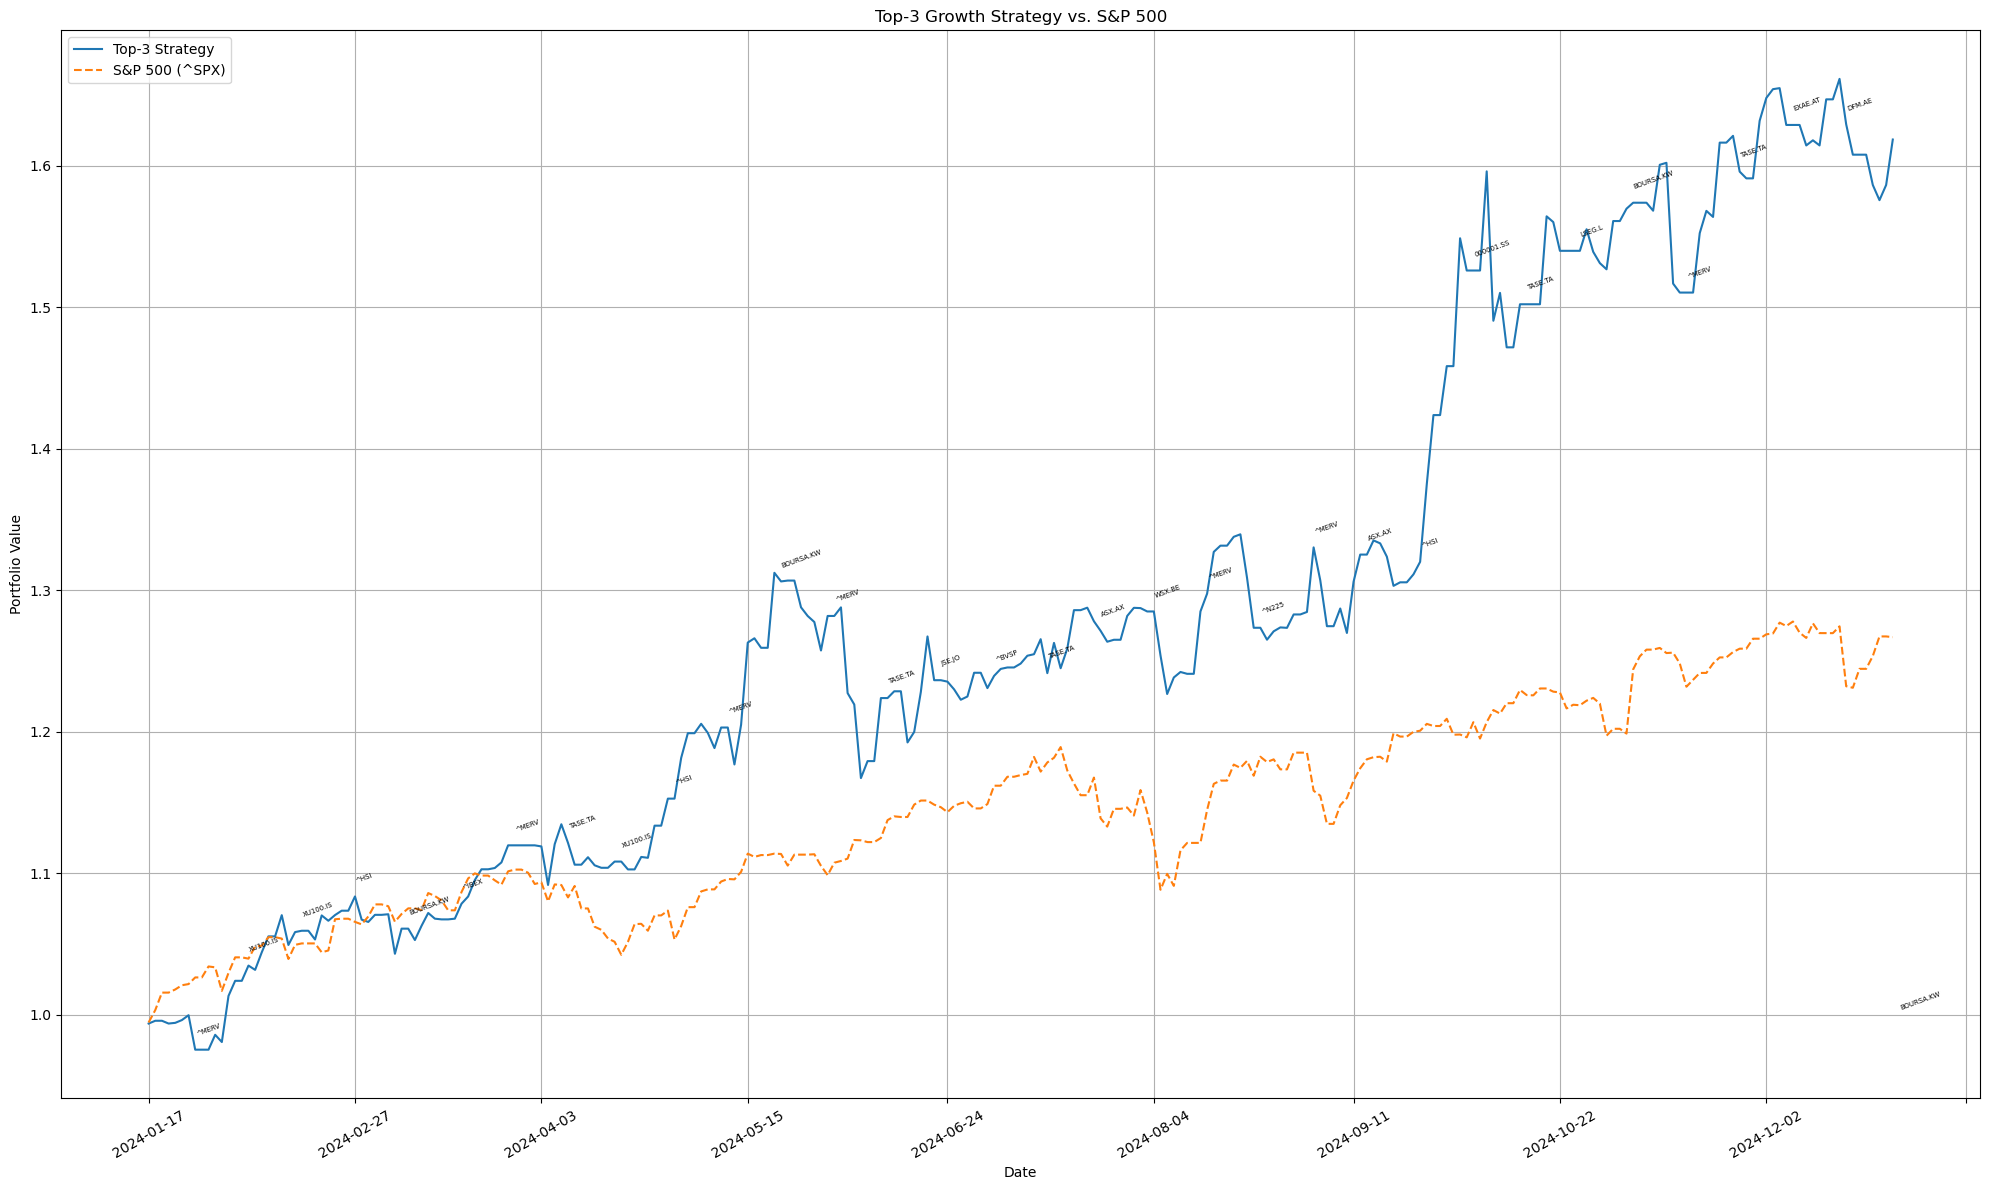

In [118]:
print(f"Top-3 Strategy Return: {portfolio[-1]:.2f}x")
print(f"S&P 500 Return: {df['^SPX'][-1]/df['^SPX'][0]:.2f}x")
plt.figure(figsize=(20, 12))
plt.plot(dates[1:], portfolio[1:], label="Top-3 Strategy")
plt.plot(spx_returns.index, spx_cum, label="S&P 500 (^SPX)", linestyle='--')

for date, top3 in annotations:
    plt.annotate(", ".join(top3), xy=(date, portfolio[dates.index(date)]),
                 xytext=(0, 10), textcoords='offset points', fontsize=5, rotation=20)

plt.title("Top-3 Growth Strategy vs. S&P 500")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)

plt.xticks(rotation=30)  # rotate date labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=20))  # show fewer ticks

plt.tight_layout()
plt.show()